# Smoking habits and BMI can impact Price Charges in Health Insurance

## In this exercise we will demonstrate how BMI and smoking habits might influence the price of Health Insurance, for both male and female individuals

In [1]:
#Importing our dataFrame
import pandas as pd
import os
wd = 'D:/CodeCademy/python-portfolio-project-starter-files'
data = pd.read_csv(wd+'/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
#General exploration
print('My dataframe has {} rows and {} columns'.format(data.shape[0],data.shape[1]))
print(data.describe())
print(data.dtypes)
print(data)

My dataframe has 1338 rows and 7 columns
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3     

### For a general overview of our dataset, let's create a PCA:
### This will reduce from n-dimension dataset to two dimension:

### First, let's transform smoker variable to numeric where 'yes' will be 0 and 'no' will be 1

In [3]:
data['smoker'] = data['smoker'].where(data['smoker']=='yes',other = 0)
data['smoker'] = data['smoker'].where(data['smoker']==0,other = 1)


### Now, let's pop out the region variable, we don't want to use it.

In [4]:
del data['region']
data

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,1,16884.92400
1,18,male,33.770,1,0,1725.55230
2,28,male,33.000,3,0,4449.46200
3,33,male,22.705,0,0,21984.47061
4,32,male,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,0,10600.54830
1334,18,female,31.920,0,0,2205.98080
1335,18,female,36.850,0,0,1629.83350
1336,21,female,25.800,0,0,2007.94500


### Now, let's standardize our data:

In [5]:
from sklearn.preprocessing import StandardScaler
variables = ['age','bmi','children','smoker','charges'] #creating a list of our variables
x = data.loc[:, variables].values #slicing our main dataframe with the variables

y = data.loc[:,['sex']].values #slicing our main dataframe to select only our groups

In [6]:

x = StandardScaler().fit_transform(x) #standardize
x

array([[-1.43876426, -0.45332   , -0.90861367,  1.97058663,  0.2985838 ],
       [-1.50996545,  0.5096211 , -0.07876719, -0.5074631 , -0.95368917],
       [-0.79795355,  0.38330685,  1.58092576, -0.5074631 , -0.72867467],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -0.5074631 , -0.96159623],
       [-1.29636188, -0.79781341, -0.90861367, -0.5074631 , -0.93036151],
       [ 1.55168573, -0.26138796, -0.90861367,  1.97058663,  1.31105347]])

In [7]:
pd.DataFrame(data = x, columns = variables).head()#visualizing...

,age,bmi,children,smoker,charges
0,-1.438764,-0.453320,-0.908614,1.970587,0.298584
1,-1.509965,0.509621,-0.078767,-0.507463,-0.953689
2,-0.797954,0.383307,1.580926,-0.507463,-0.728675
3,-0.441948,-1.305531,-0.908614,-0.507463,0.719843
4,-0.513149,-0.292556,-0.908614,-0.507463,-0.776802


In [8]:
#Creating the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [9]:
principalComponents = pca.fit_transform(x)#Creating PCA with two dimensions
principalComponents

array([[ 0.93238637, -2.27162953],
       [-1.27748226, -0.44947819],
       [-0.83928017,  0.36004491],
       ...,
       [-1.24699697, -0.37258483],
       [-1.52546602, -1.28318407],
       [ 2.43508422, -0.26697764]])

In [10]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf
data.shape[0] == principalDf.shape[0] #Checking if both dataframe has the same number of lines

True

In [11]:
completeDF = pd.concat([principalDf, data[['sex']]], axis = 1)#concatenating our pca dataframe with our classes:

print(pca.explained_variance_ratio_)#% of explanation for each principal componenent

[0.37455263 0.22210629]


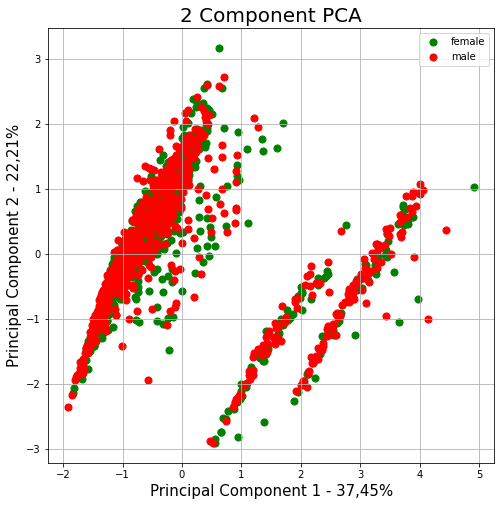

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1) 
ax1.set_xlabel('Principal Component 1 - 37,45%'  , fontsize = 15)
ax1.set_ylabel('Principal Component 2 - 22,21%', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = ['female', 'male']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = completeDF['sex'] == target
    ax1.scatter(completeDF.loc[indicesToKeep, 'principal component 1']
               , completeDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()


### There are 3 distinct data groups for men and women. As an initial hypothesis, I expected a difference between male and female, but my PCA plot tells me a different story.
### Let's explore in a little more detail.
### First, let's split the dataframe in two. One for all male data and one for all female data

In [14]:
#Let's create our original dataframe again
wd = 'D:/CodeCademy/python-portfolio-project-starter-files'
data2 = pd.read_csv(wd+'/insurance.csv')
#Homem
male = data2.query('sex =="male"')
male
#Woman
female = data2.query('sex=="female"')
print(male)
print(female)

      age   sex     bmi  children smoker     region      charges
1      18  male  33.770         1     no  southeast   1725.55230
2      28  male  33.000         3     no  southeast   4449.46200
3      33  male  22.705         0     no  northwest  21984.47061
4      32  male  28.880         0     no  northwest   3866.85520
8      37  male  29.830         2     no  northeast   6406.41070
...   ...   ...     ...       ...    ...        ...          ...
1324   31  male  25.935         1     no  northwest   4239.89265
1325   61  male  33.535         0     no  northeast  13143.33665
1327   51  male  30.030         1     no  southeast   9377.90470
1329   52  male  38.600         2     no  southwest  10325.20600
1333   50  male  30.970         3     no  northwest  10600.54830

[676 rows x 7 columns]
      age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
5      31  female  25.74         0     no  southeast   3756.6216

### First, let's make a simple violin plot to see the difference between the two genders:

Text(0.5, 0, 'Charges')

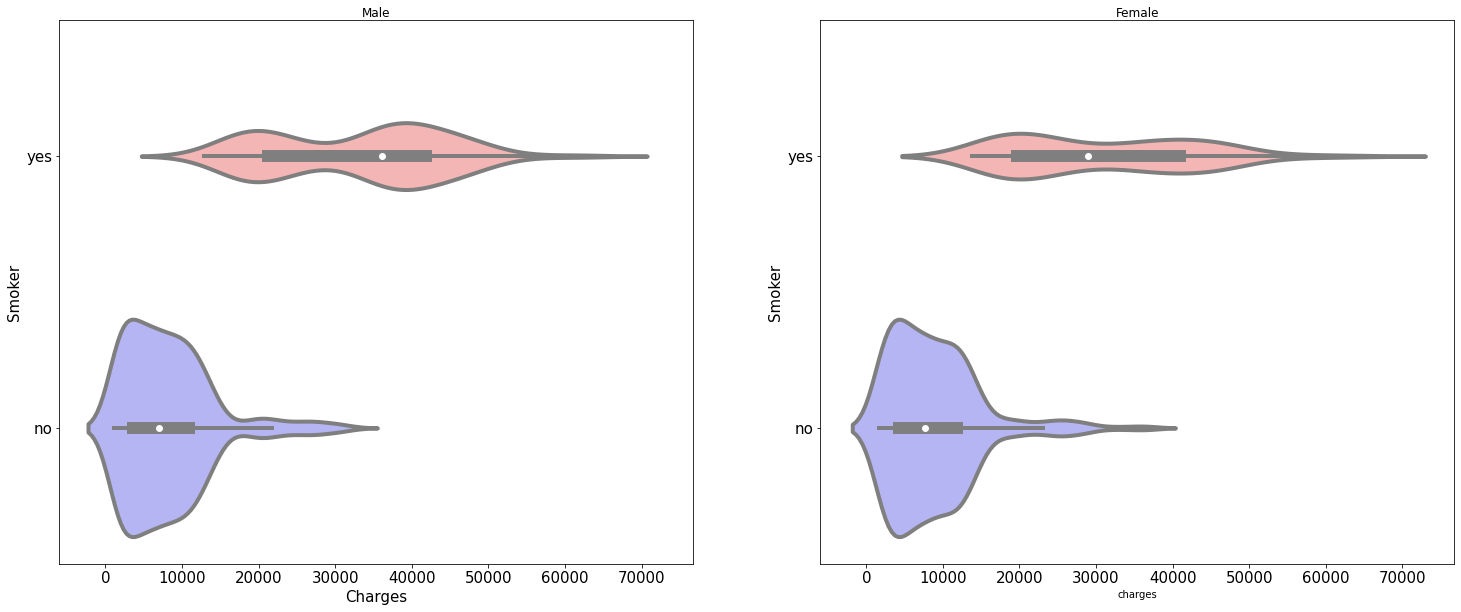

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(25,10))
sns.violinplot(ax = axes[0],x="charges", y="smoker",   data=male,order=[ "yes",'no'],linewidth=4,palette='bwr_r',
               scale="count")
sns.violinplot(ax = axes[1],x="charges", y="smoker",   data=female,order=[ "yes",'no'],linewidth=4,palette='bwr_r',
              scale="count")
axes[0].set_title(label = 'Male', fontdict=None, loc='center', pad=0)
axes[1].set_title(label = 'Female', fontdict=None, loc='center', pad=0)

axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_ylabel('Smoker',fontsize = 15)
axes[1].set_ylabel('Smoker',fontsize = 15)
axes[0].set_xlabel('Charges',fontsize = 15)
axes[0].set_xlabel('Charges',fontsize = 15)


### Overall, the price for smokers are higher than for non-smokers
### The median price (white dot in the boxplot) for male smokers are higher than for female smokers.
### The distribution of price for non-smokers  are more clustered around the first quartile while for smokers, the data are more scattered.
### So far, the fact that if an individual has the habits of smoke, he/she will pay more for health insurance

### Let's see the relation of age, price of health insurance and the habits of smoke for males and females:


Text(0.5, 1.0, 'Female')

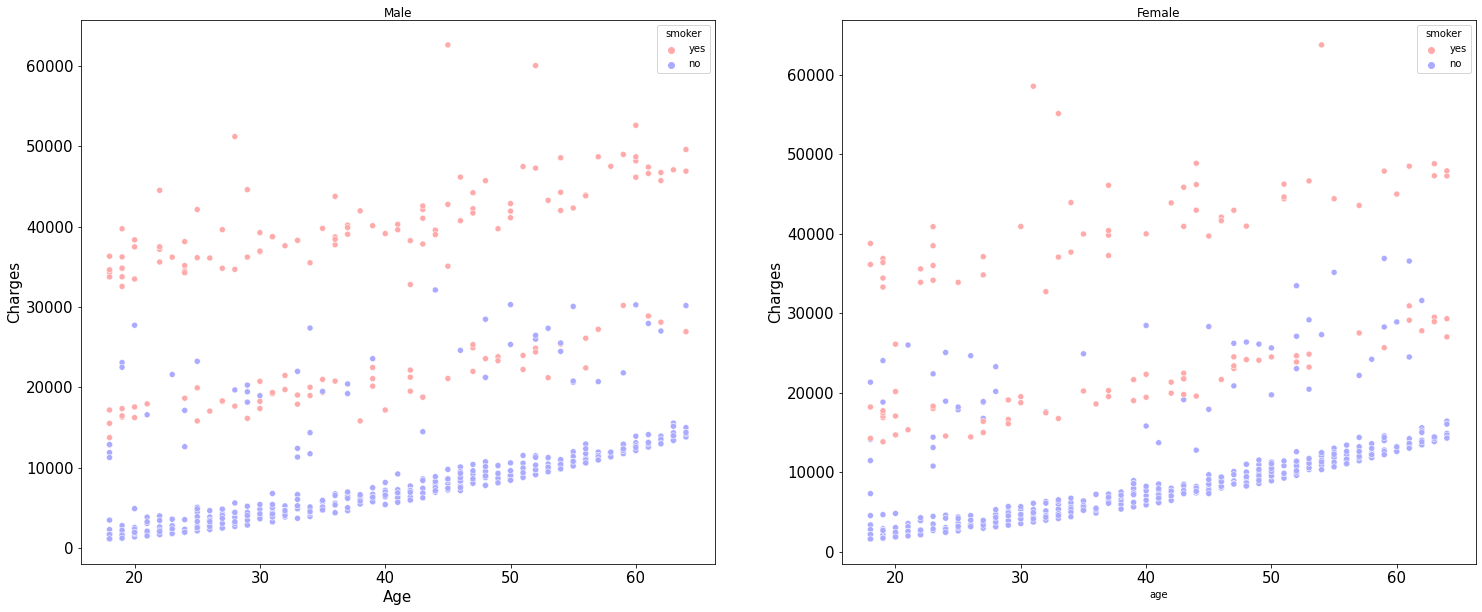

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(25,10))
sns.scatterplot(data = male,x= 'age',y = 'charges',hue = 'smoker',ax = axes[0],hue_order = ['yes','no'],palette='bwr_r')
sns.scatterplot(data = female,x='age',y = 'charges',hue = 'smoker',ax = axes[1],hue_order = ['yes','no'],palette='bwr_r')
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_ylabel('Charges',fontsize = 15)
axes[1].set_ylabel('Charges',fontsize = 15)
axes[0].set_xlabel('Age',fontsize = 15)
axes[0].set_xlabel('Age',fontsize = 15)
axes[0].set_title(label = 'Male', fontdict=None, loc='center', pad=0)
axes[1].set_title(label = 'Female', fontdict=None, loc='center', pad=0)

### The scatterplot of age by charges for female and male give us some interesting insigths:
#### ° both plots looks similar to the PCA plot;
#### ° indepedent of the gender, non smokers will pay less for charges than smokers;
#### ° The older the person, the expensive is the charge

### So, age is a factor that contributes to the price as well as smoke
### Let's see how much BMI also contributes

Text(0.5, 1.0, 'Female')

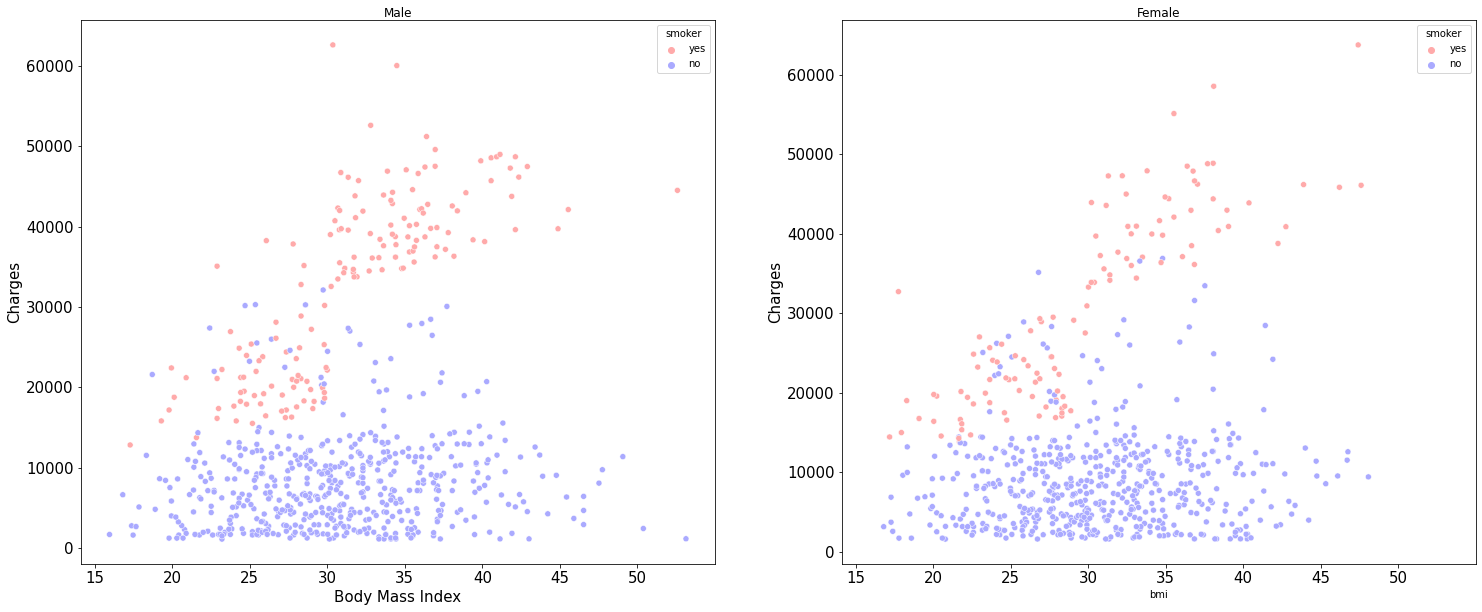

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(25,10))
sns.scatterplot(data = male,x= 'bmi',y = 'charges',hue = 'smoker',ax = axes[0],hue_order = ['yes','no'],palette='bwr_r')
sns.scatterplot(data = female,x='bmi',y = 'charges',hue = 'smoker',ax = axes[1],hue_order = ['yes','no'],palette='bwr_r')
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_ylabel('Charges',fontsize = 15)
axes[1].set_ylabel('Charges',fontsize = 15)
axes[0].set_xlabel('Body Mass Index',fontsize = 15)
axes[0].set_xlabel('Body Mass Index',fontsize = 15)
axes[0].set_title(label = 'Male', fontdict=None, loc='center', pad=0)
axes[1].set_title(label = 'Female', fontdict=None, loc='center', pad=0)

### If we take the BMI of 35, for exemple, an individual that do not smoke will pay less then an individual that has smoke habits
### Tabagism really seens to have a high impact in charges, independent of the gender. Let's now explore the relation of the number of childrens
### Since number of childrens is a categoric variable, let's use pointplot instead of scatterplot

Text(0.5, 1.0, 'Female')

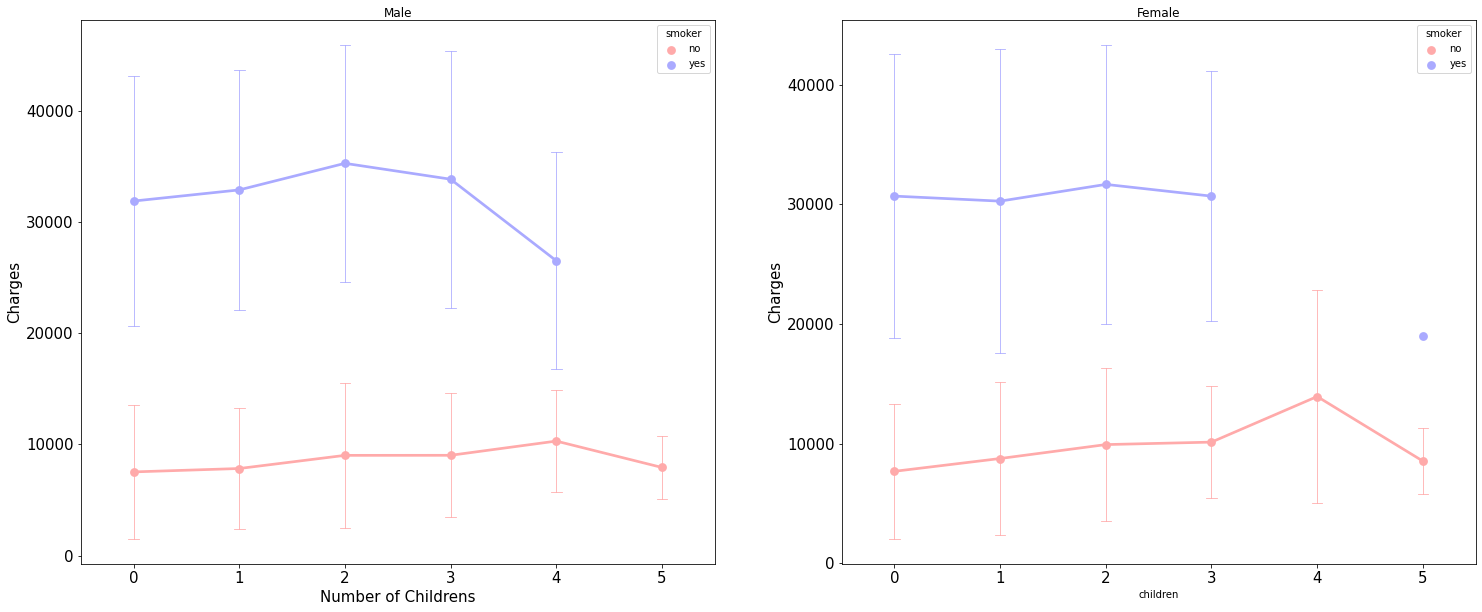

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(25,10))

sns.pointplot(x="children", y="charges", data=male,hue = 'smoker',ax = axes[0],hue_order = ['no','yes'],ci = 'sd',errwidth=0.8,capsize=0.1,palette='bwr_r')
sns.pointplot(x="children", y="charges", data=female,hue = 'smoker',ax = axes[1],hue_order = ['no','yes'],ci = 'sd',errwidth=0.8,capsize=0.1,palette='bwr_r')

axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_ylabel('Charges',fontsize = 15)
axes[1].set_ylabel('Charges',fontsize = 15)
axes[0].set_xlabel('Number of Childrens',fontsize = 15)
axes[0].set_xlabel('Number of Childrens',fontsize = 15)
axes[0].set_title(label = 'Male', fontdict=None, loc='center', pad=0)
axes[1].set_title(label = 'Female', fontdict=None, loc='center', pad=0)

### Like others plots, smokers individuals pays more for health insurance. However the number of children itself seems to not contribute a lot for price, nor the gender seems to contribute for charge price

### Ok, enough of data visualization! Let's compare the mean values of charges between genders.

In [19]:
mean_charges_male = male['charges'].mean()
mean_charges_female = female['charges'].mean()
print('Male costumers pays on average {} while female pays {}'.format(mean_charges_male,mean_charges_female))

Male costumers pays on average 13956.751177721886 while female pays 12569.57884383534


### What about if we aggregate by smoking habits

In [20]:
mean_male_smoker=male.query('smoker == "yes"')['charges'].mean()
mean_male_nonsmoker=male.query('smoker == "no"')['charges'].mean()
mean_female_smoker=female.query('smoker == "yes"')['charges'].mean()
mean_female_nonsmoker=female.query('smoker == "no"')['charges'].mean()

print('Average price for male smokers:{}'.format(mean_male_smoker),'\n''Average price for male non smokers:{}'.format(mean_male_nonsmoker),
      '\n''Average price for female smokers:{}'.format(mean_female_smoker),'\n''Average price for female non smoker:{}'.format(mean_female_nonsmoker))

Average price for male smokers:33042.00597528302 
Average price for male non smokers:8087.204731276592 
Average price for female smokers:30678.996276260867 
Average price for female non smoker:8762.297299541116


### Ok, let's check if these differences are statisticly significance:
#### First, we are going to plot the distribution of our data to analyze the curve shape. We are doing that so we can know what type of Levene's Test we are going to use

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

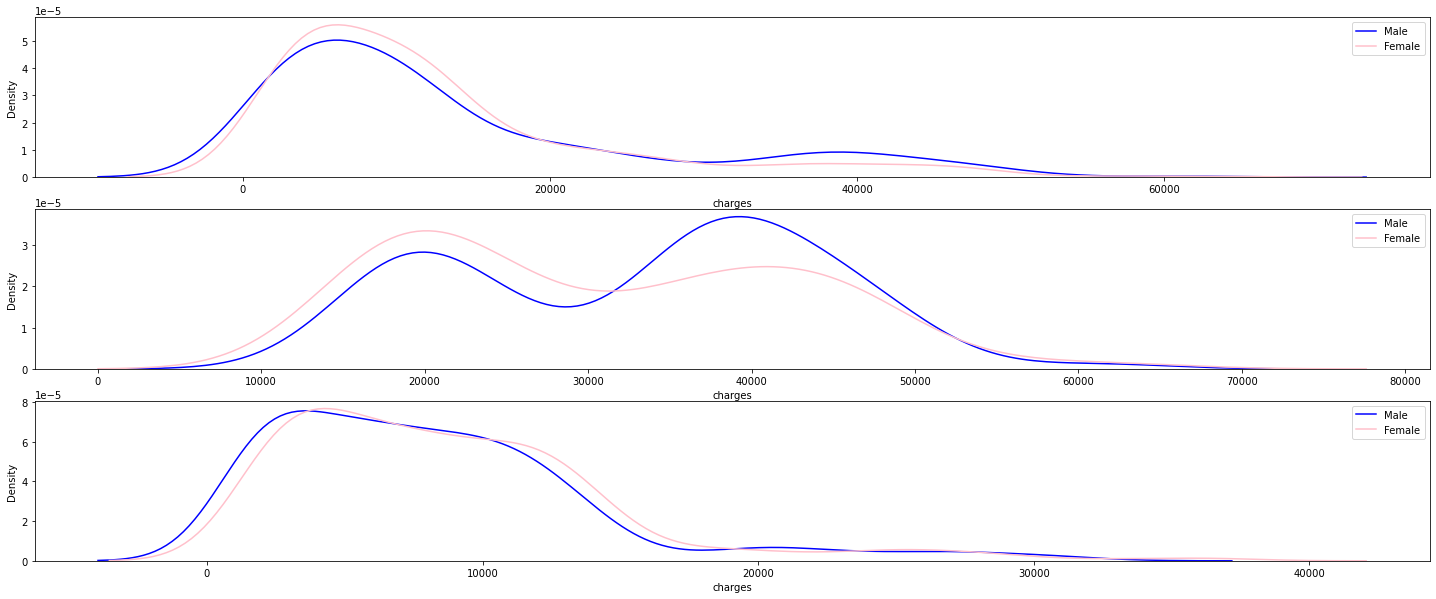

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(25,10))
sns.distplot(a = male['charges'],ax = axes[0],hist = False,kde = True,color = 'b')
sns.distplot(a = female['charges'],ax = axes[0],hist = False,kde = True,color = 'pink')
axes[0].legend(labels=['Male','Female'])

sns.distplot(a = male.query('smoker == "yes"')['charges'],ax = axes[1],hist = False,kde = True,color = 'b')
sns.distplot(a = female.query('smoker == "yes"')['charges'],ax = axes[1],hist = False,kde = True,color = 'pink')
axes[1].legend(labels=['Male','Female'])

sns.distplot(a = male.query('smoker == "no"')['charges'],ax = axes[2],hist = False,kde = True,color = 'b')
sns.distplot(a = female.query('smoker == "no"')['charges'],ax = axes[2],hist = False,kde = True,color = 'pink')
axes[2].legend(labels=['Male','Female'])



### The Levene Test is used to determine whether two or more groups have equal variances. It is commonly used because many statistical tests make the assumption that groups have equal variances and Levene’s Test allows you to determine if this assumption is satisified.

### Our null hypothesis is that every group has equal variance. If our p-value is below  0.05, we will reject null hypothesis. In other words, there is difference in the variances


In [24]:
import scipy.stats as stats
my_levene_all=stats.levene(male['charges'], female['charges'], male.query('smoker == "yes"')['charges'],female.query('smoker == "yes"')['charges'],
             male.query('smoker == "no"')['charges'],female.query('smoker == "no"')['charges'], center='trimmed')

print("The p-value is {} ".format(my_levene_all[1]),'\n',"It's {} that the p-value is lower than 0.05".format(my_levene_all[1]<0.05))
     


The p-value is 1.2837773265523506e-96  
 It's True that the p-value is lower than 0.05


### Our p-value is lower than 0.05, therefore we will reject our null hypothesis. There is difference in the variances.
### Let's use  T-Test among our data
### We are going to perform  Independent Sample T-Test to compare mean value of males and females
#### Null Hypothesis: µa = µb (the means of both populations are equal)
#### Alternate Hypothesis: µa ≠ µb (the means of both populations are not equal)

##### We are going to execute several t tests:
###### °  between male and females
###### ° between male smokers and female smokers
###### ° between male non smokers and female non smokers
###### °  between male smokers and male non smokers
###### ° between female smokers and female non smokers

In [30]:
# Between male and female:
tStat, pValue = stats.ttest_ind(male['charges'], female['charges'], equal_var = False)
print(tStat,pValue,'\n',"It's {} that the p-value is lower than 0.05".format(pValue<0.05))


2.1008878232359565 0.035841014956016645 
 It's True that the p-value is lower than 0.05


In [33]:
#between male smokers and female smokers
tStat2, pValue2 = stats.ttest_ind(male.query('smoker == "yes"')['charges'], female.query('smoker == "yes"')['charges'], equal_var = False)
print(tStat2,pValue2,'\n',"It's {} that the p-value is lower than 0.05".format(pValue2 <0.05))


1.661679089734955 0.09790099033116885 
 It's False that the p-value is lower than 0.05


In [35]:
#between male non smokers and female non smokers
tStat3, pValue3 = stats.ttest_ind(male.query('smoker == "no"')['charges'], female.query('smoker == "no"')['charges'], equal_var = False)
print(tStat3,pValue3,'\n',"It's {} that the p-value is lower than 0.05".format(pValue3 <0.05))


-1.839622216350089 0.06610296328675346 
 It's False that the p-value is lower than 0.05


In [38]:
#between male smokers and male non smokers
tStat4, pValue4 = stats.ttest_ind(male.query('smoker == "yes"')['charges'], male.query('smoker == "no"')['charges'], equal_var = False)
print(tStat4,pValue4,'\n',"It's {} that the p-value is lower than 0.05".format(pValue4 <0.05))



26.959295124813806 4.0274216725608303e-66 
 It's True that the p-value is lower than 0.05


In [39]:
#between female smokers and female non smokers
tStat5, pValue5 = stats.ttest_ind(female.query('smoker == "yes"')['charges'], female.query('smoker == "no"')['charges'], equal_var = False)
print(tStat5,pValue5,'\n',"It's {} that the p-value is lower than 0.05".format(pValue5 <0.05))



19.221439797102985 2.2836533745243647e-39 
 It's True that the p-value is lower than 0.05


# The mean price charged for men and woman are not statistically equal, however:
## ºThe mean price charged for smokers is  statistically equal for men and women.
## ºThe mean price charged for non-smokers is statistically equal for men and women.
## ºThe mean price charged is statistically different for smokers and non-smokers, regardless of gender

### We deduced that there is difference in charge prices for smokers and non smokers. Let's check if for BMI we will have similar results


###### We are not going to test on age because aging is something natural of all human beings, however, smoking habits and BMI are somethings that we can make efforts to change (for the best or for the worst)

### Since BMI is a continuous variable, first we need to transform it to descrete, in order to apply the T test.
### For the sake of this exercise and, in order to make it simple, let's get the median value of BMI for men and woman:

In [41]:
median_male = male['bmi'].median()
median_female = female['bmi'].median()
print(median_male,median_female)

30.6875 30.1075


### Now, if the BMI of a given individual are below or equal the median value, we will turn this value to 'Low', otherwise will be  'High'

In [43]:
male['bmi'] = male['bmi'].where(male['bmi'] >median_male,other = 'Low')
male['bmi'] = male['bmi'].where(male['bmi'] == 'Low',other = 'High')

female['bmi'] = female['bmi'].where(female['bmi'] >median_female,other = 'Low')
female['bmi'] = female['bmi'].where(female['bmi'] == 'Low',other = 'High')


C:\Users\eduar\AppData\Local\Temp/ipykernel_36640/3694743016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['bmi'] = male['bmi'].where(male['bmi'] >median_male,other = 'Low')
C:\Users\eduar\AppData\Local\Temp/ipykernel_36640/3694743016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['bmi'] = male['bmi'].where(male['bmi'] == 'Low',other = 'High')
C:\Users\eduar\AppData\Local\Temp/ipykernel_36640/3694743016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

### Ok, now let's apply the Levene Test. First, we are going to see the distribution of data:


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

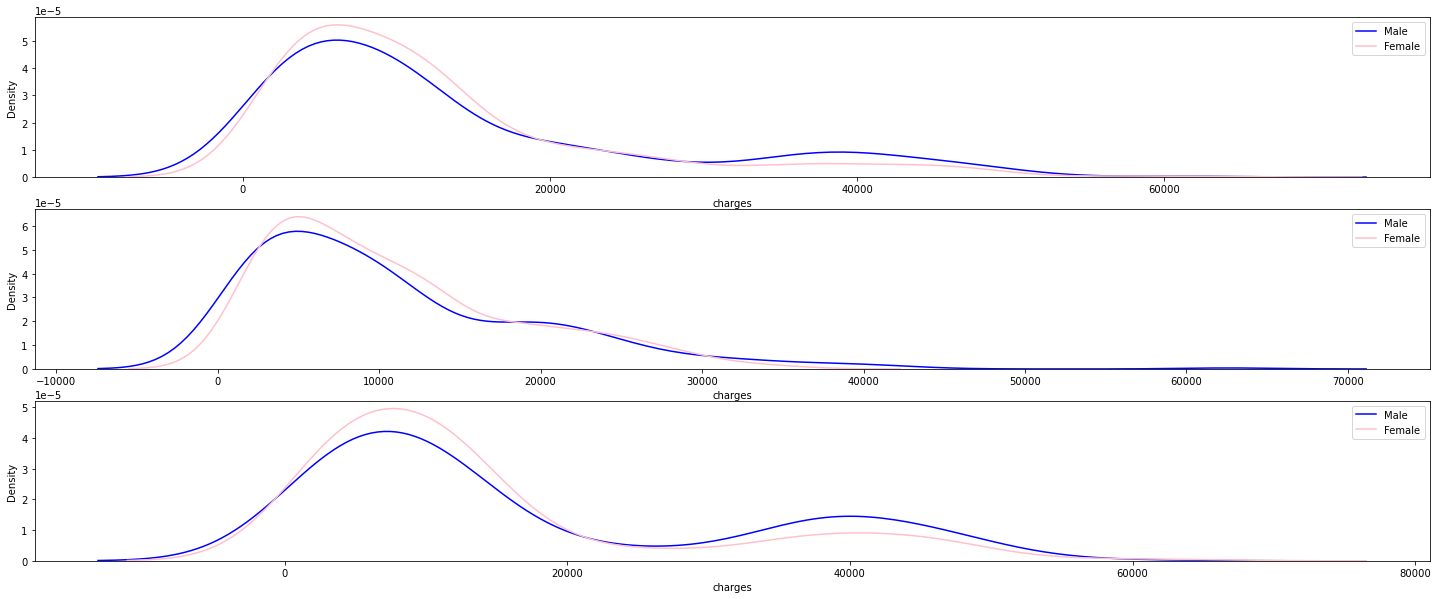

In [46]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(3, 1, sharex=False, figsize=(25,10))
sns.distplot(a = male['charges'],ax = axes[0],hist = False,kde = True,color = 'b')
sns.distplot(a = female['charges'],ax = axes[0],hist = False,kde = True,color = 'pink')
axes[0].legend(labels=['Male','Female'])

sns.distplot(a = male.query('bmi == "Low"')['charges'],ax = axes[1],hist = False,kde = True,color = 'b')
sns.distplot(a = female.query('bmi == "Low"')['charges'],ax = axes[1],hist = False,kde = True,color = 'pink')
axes[1].legend(labels=['Male','Female'])

sns.distplot(a = male.query('bmi == "High"')['charges'],ax = axes[2],hist = False,kde = True,color = 'b')
sns.distplot(a = female.query('bmi == "High"')['charges'],ax = axes[2],hist = False,kde = True,color = 'pink')
axes[2].legend(labels=['Male','Female'])


### We will use trimmed argument as well:

In [48]:
import scipy.stats as stats
my_levene2_all=stats.levene(male['charges'], female['charges'], male.query('bmi == "Low"')['charges'],female.query('bmi == "Low"')['charges'],
             male.query('bmi == "High"')['charges'],female.query('bmi == "High"')['charges'], center='trimmed')

print("The p-value is {} ".format(my_levene2_all[1]),'\n',"It's {} that the p-value is lower than 0.05".format(my_levene2_all[1] <0.05))
     


The p-value is 3.8249704438222156e-50  
 It's True that the p-value is lower than 0.05


### Following the same methodology, we will use  Independent Sample T-Test to compare low and high BMI:
##### We are going to execute several t tests:
###### °  between male high BMI and females high BMI
###### ° between male Low BMI and female Low BMI

#### Null Hypothesis: µa = µb (the means of both populations are equal)
#### Alternate Hypothesis: µa ≠ µb (the means of both populations are not equal)

In [49]:
#between male high BMI and female high BMI
tStat_BMI1, pValue_BMI1 = stats.ttest_ind(male.query('bmi == "High"')['charges'], female.query('bmi == "High"')['charges'], equal_var = False)
print(tStat_BMI1, pValue_BMI1,'\n',"It's {} that the p-value is lower than 0.05".format(pValue_BMI1 <0.05))
      #Rejeita H0

2.3256416939511566 0.020339659701703077 
 It's True that the p-value is lower than 0.05


In [51]:
#between male low BMI and female low BMI
tStat_BMI2, pValue_BMI2 = stats.ttest_ind(male.query('bmi == "Low"')['charges'], female.query('bmi == "Low"')['charges'], equal_var = False)
print(tStat_BMI2, pValue_BMI2,'\n',"It's {} that the p-value is lower than 0.05".format(pValue_BMI2 <0.05))
     

0.26372026472184557 0.7920791740921107 
 It's False that the p-value is lower than 0.05


In [52]:
#between male High BMI and male low BMI
tStat_BMI3, pValue_BMI3 = stats.ttest_ind(male.query('bmi == "Low"')['charges'], male.query('bmi == "High"')['charges'], equal_var = False)
print(tStat_BMI3, pValue_BMI3,'\n',"It's {} that the p-value is lower than 0.05".format(pValue_BMI3 <0.05))
     

-6.216624650159713 1.0058644676301914e-09 
 It's True that the p-value is lower than 0.05


In [53]:
#between Female High BMI and Female low BMI
tStat_BMI4, pValue_BMI4 = stats.ttest_ind(female.query('bmi == "Low"')['charges'], female.query('bmi == "High"')['charges'], equal_var = False)
print(tStat_BMI4, pValue_BMI4,'\n',"It's {} that the p-value is lower than 0.05".format(pValue_BMI4 <0.05))
     

-4.218763980330503 2.901272118355196e-05 
 It's True that the p-value is lower than 0.05


### Our last result show us that there is difference in the mean value between charges for male and female with high BMI but not with low BMI. We also find out that the price, on average, are different on each population (male or female) when comparing high and low BMI.

## To conclude, BMI and Smoking habits are important variables when analizing the distribution of the variable Charges.
### If you want to use this database to create prediction models for charges, use smoking habits and BMI as an independent variable would be desireble